## Import Libray

In [ ]:
from keras.models import Sequential #Model Secara Berurutan
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D #Mereduksi Citra
from keras.layers import Dropout #Mencegah Overfitting
from keras.optimizers import Adam ,RMSprop #Pengaturan Learning Rate

In [ ]:
import matplotlib.pyplot as plt #Visualisasi
import numpy as np #Komputasi Numerik

## Data Collection

In [ ]:
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
print("Jumlah Data, Lebar Piksel, Tinggi Piksel, Warna", X_train.shape)

Jumlah Data, Lebar Piksel, Tinggi Piksel, Warna (50000, 32, 32, 3)


In [ ]:
X_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

## Data Processing

In [ ]:
#Normalisasi
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical #Multiclass

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Modeling

In [ ]:
import tensorflow as tf
input_shape = X_train.shape[1:] #(32,32,3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same',
                           activation = 'relu', input_shape = input_shape), #Conv2D Pertama
    tf.keras.layers.MaxPooling2D(2, 2), #Mereduksi Citra
    tf.keras.layers.Dropout(0.3), #Menvegah Overfitting

    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same',
                           activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same',
                           activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),     

    tf.keras.layers.Flatten(), #Reshape feature map dari multidimensional array menjadi vektor
    tf.keras.layers.Dense(512, activation = 'relu'), #Hidden Layer  
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') #Output   
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 64)         

In [ ]:
model.compile(optimizer = 'adam', #Pengaturan Learning Rate
              loss = 'categorical_crossentropy', #Untuk mengatur informasi yg hilang
              metrics = ['accuracy'])

# Trainning Model

In [ ]:
hist = model.fit(X_train, Y_train,
                 epochs=25,
                 batch_size=1000,
                 shuffle=True,
                 validation_data=(X_test, Y_test))

Epoch 1/25
50/50 [==============================] - 4s 51ms/step - loss: 2.0682 - accuracy: 0.2332 - val_loss: 1.9114 - val_accuracy: 0.3158
Epoch 2/25
50/50 [==============================] - 2s 44ms/step - loss: 1.7101 - accuracy: 0.3754 - val_loss: 1.6174 - val_accuracy: 0.4343
Epoch 3/25
50/50 [==============================] - 2s 46ms/step - loss: 1.5360 - accuracy: 0.4418 - val_loss: 1.4347 - val_accuracy: 0.4901
Epoch 4/25
50/50 [==============================] - 2s 46ms/step - loss: 1.4127 - accuracy: 0.4885 - val_loss: 1.3071 - val_accuracy: 0.5442
Epoch 5/25
50/50 [==============================] - 2s 43ms/step - loss: 1.3303 - accuracy: 0.5231 - val_loss: 1.2127 - val_accuracy: 0.5778
Epoch 6/25
50/50 [==============================] - 2s 46ms/step - loss: 1.2586 - accuracy: 0.5506 - val_loss: 1.1590 - val_accuracy: 0.5964
Epoch 7/25
50/50 [==============================] - 2s 46ms/step - loss: 1.1887 - accuracy: 0.5732 - val_loss: 1.1055 - val_accuracy: 0.6094
Epoch 8/25
50

## Model Evaluation

In [ ]:
score = model.evaluate(X_test, Y_test)
print("Accuracy: ", score[1]*100, "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.7456 - accuracy: 0.7390
Accuracy:  73.90000224113464 %


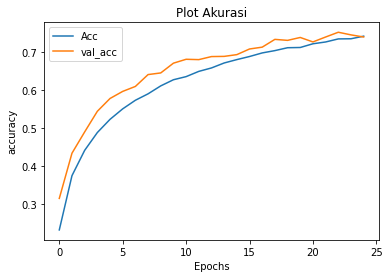

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acc', 'val_acc'])
plt.title('Plot Akurasi')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

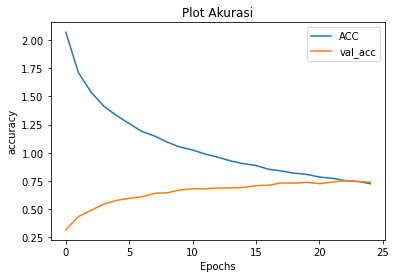

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['ACC', 'val_acc'])
plt.title('Plot Akurasi')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

## Model Prediction

1/1 [==============================] - 0s 17ms/step


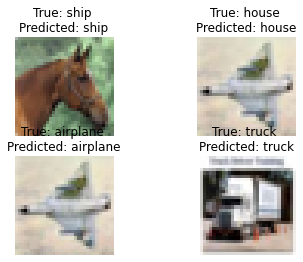

In [ ]:
dict_label = {0:'airplane', 1:'automobile', 2:'bird',
              3:'cat', 4:'deer', 5:'dog',
              6:'frog', 7:'house', 8:'ship', 9:'truck'}
def predict():
  some_random_number = np.random.randint(low = 0, high = len(X_test)-1, size=4)
  sample_images = X_train[some_random_number]
  sample_label = Y_train[some_random_number]
  predicted = model.predict(sample_images)
  predicted = np.argmax(predicted, axis=1)
  true_label = np.argmax(sample_label, axis =1)
  fig, axs = plt.subplots(2, 2)
  for row in range(2):
    for col in range(2):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col+1])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row, col].imshow(sample_images[row+col+1])
      axs[row, col].set_title('True: %s \nPredicted: %s' % (dict_label[true], dict_label[pred]))
      axs[row, col].axis('off')

predict()